Modul Ini berisi Model Inference untuk di file lain.

# Importing alat yang dibutuhkan

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

Tensor Flow telah di downgrade ke versi yang telah diinginkan

In [2]:
# mounting dulu dari gdrive butuh permision dan lain lain
from google.colab import drive
drive.mount('/content/drive')

print('Google Drive Telah Berhasil Terhubung')

Mounted at /content/drive
Google Drive Telah Berhasil Terhubung


Penyimpanan model banyak cara. untuk saat ini saya memilih untuk menyimpan di drive dengan pertimbangan supaya lebih praktis semua.

In [3]:
# import Libraries
import pickle
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


Library Telah berhasil diimport di notebook ini

In [4]:
# karena sudah dimounting tinggal ambil saja dari drivenya
model = load_model('/content/drive/MyDrive/my_model.h5')

# open nama class.
with open('/content/classes.txt', 'r') as file:
    class_names = [line.strip() for line in file]

Disini kita membuat nama kelas kita urutin sesuai dengan yang ada di notebook awal. Jangan sampai terbalik kemungkinan akan salah prediksi jika kebalik.

# Inference pertama klasifikasi kopi tidak tau

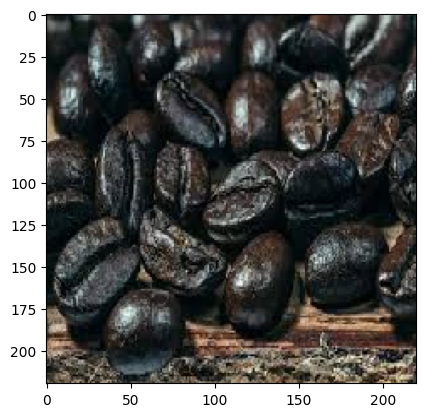

In [5]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/dark.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()


Jelas ini dark. cuma saya random aja gambar di internet

In [6]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)



1/1 [==============================] - 3s 3s/step
Prediksi kelas: Dark


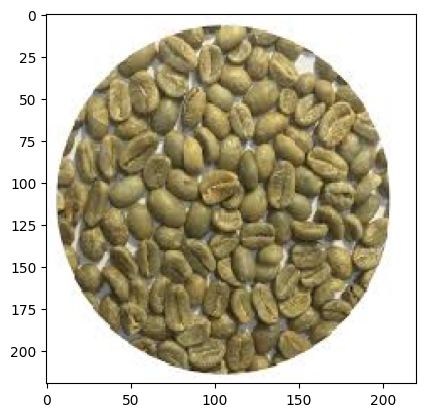

In [7]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/bolaven.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Saya kurang tau apakah ini kopi bolaven atau tidak, cuma kopi random aja yang saya ambil dari internet. Terdapat noise (biji kopi tidak hanya satu seperti di studio) apakah model bisa klasifikasi dengan benar.

In [8]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 1s 551ms/step
Prediksi kelas: Medium


Model memprediksi medium. Model cukup bagus untuk warna-warna yang senada dan seirama. Meskipun terdapat banyak biji namun model bisa menentukan dengan baik.

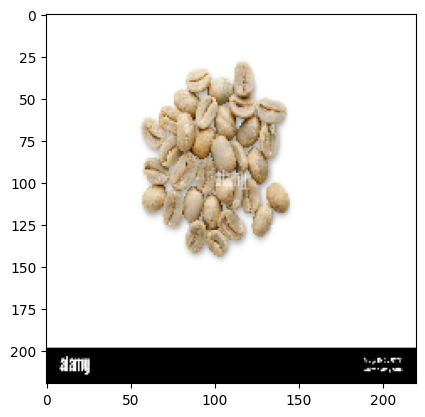

In [9]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/coffee_bg_putih.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Kita simulasikan bagaimana dia memprediksi kopi dengan background putih seperti di studio, Ternyata ini memang kopi yang light roasting. Namun balik lagi gambar ini saya kurang tau menunjukkan apakah light roast atau medium, namun sekilas ini menunjukkan light roast. karena jika ini green bean maka warna cenderung hijau.

In [10]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 478ms/step
Prediksi kelas: Light


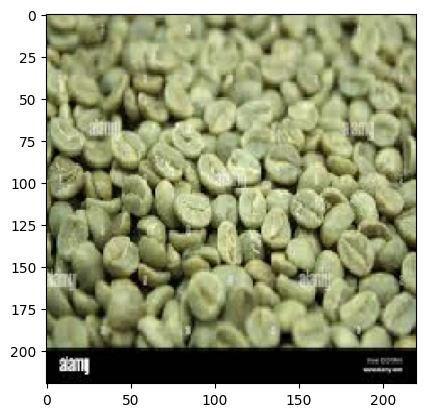

In [11]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Disini memang saya coba spesifik kopi random dari internet dengan kata kunci green bean, kita lihat apakah model kita bisa mendeteksi. Terlihat ada noise di bawah itu tulisan atau apa itu. apakah model kira-kira bisa memprediksi dengan baik.

In [12]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 1s 797ms/step
Prediksi kelas: Green


Prediksi benar itu merupakan biji kopi yang belum diolah.

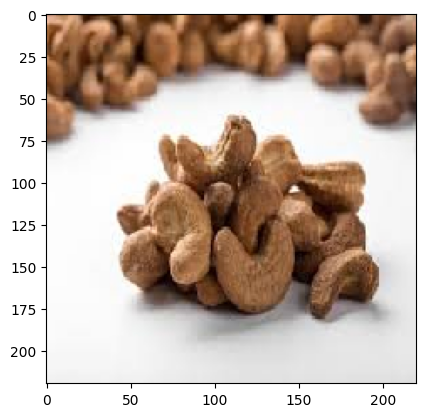

In [13]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/nuts_cashew.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Mencoba gambar lain bukan berbentuk kopi namun warna mirip kopi dan ada banyak biji juga.

In [14]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 495ms/step
Prediksi kelas: Light


Gambar kacang ini terdeteksi light roasting.

# Inference dengan kopi yang diketahui klasifikasi roasting level varietas biji tidak diketahui

Karena kita dari tadi mencoba biji kopi random tanpa pengetahuan yang jelas, bagaimana jika kita coba untuk sesuai tingkat kematangan dan biji kopi yang diambil banyak. tidak satu seperti di studio.

Verifikasi gambar saya ambil dari salah satu website pecinta kopi. Di dalam website itu dijelaskan juga apakah biji itu medium atau light atau dark.

https://kopikita.id/mengenal-level-roasting/ mengambil dari website ini sebagai klasifikasi yang lebih baik untuk verifikasi level kopi terbaik.

Gambar utama yang ada di website kemudian saya crop untuk setiap inference nya.

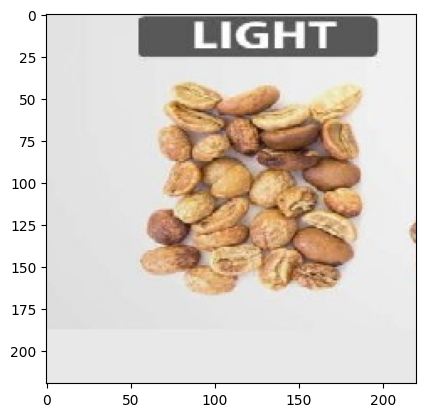

In [15]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/light_klasifikasi.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

In [16]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 1s 833ms/step
Prediksi kelas: Light


Model masih menunjukkan performansi. Padahal dalam gambar terlihat ada biji kopi yang kecoklatan. Di dalam website tidak ada kata petunjuk ini adalah kopi lao bolaven. Jadi model ketika kita coba dengan varietas kopi yang lain cukup bagus performanya.

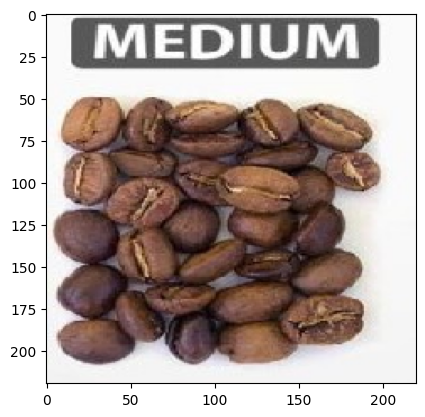

In [20]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/medium_klasifikasi.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Kita coba ambil biji kopi yang medium, bagaimana klasifikasinya. disini harusnya masih ada noise dengan banyaknya biji kopi tersebar.

In [21]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 479ms/step
Prediksi kelas: Light


Terjadi mulai penyimpangan. Model tidak bisa mendefinisikan dengan baik. Karena noisenya mungkin dan juga bukan dari jenis kopi doi chaang untuk medium roastingnya.

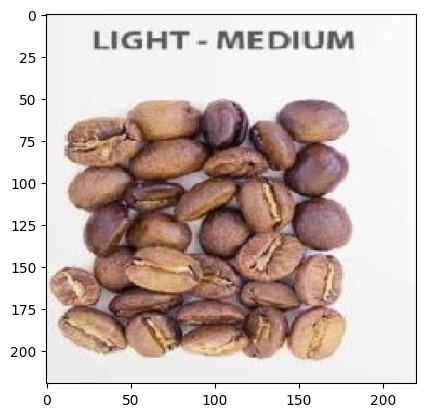

In [22]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/ligt_medium_klasifikasi.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Kita coba performansinya pada kelas light medium. Ini merupakan membingungkan karena kelas ini di tengah2 antara light dan medium.

In [23]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 473ms/step
Prediksi kelas: Light


Model ketika ada kebingungan warna cenderung model klasifikasi untuk light dibandingkan medium

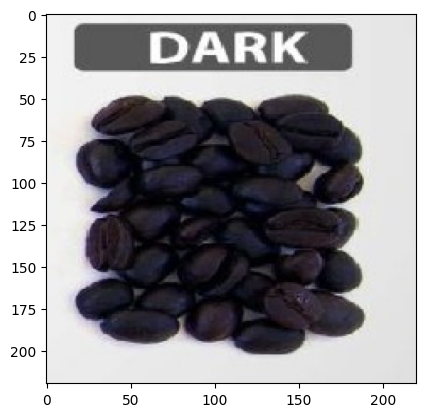

In [24]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/dark_klasifikasi.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Ini kita coba untuk kelas dark. Tetap dengan biji banyak

In [25]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 480ms/step
Prediksi kelas: Dark


Untuk kelas dark model bisa memprediksi dengan baik, meskipun terdapat banyak biji model tidak bingung.

# Early Hipotesis

Model bisa memprediksi dengan baik. Untuk kelas kelas tertentu seperti medium dan light. model masih kebingungan dan cenderung untuk memilih light dibandingkan medium. Untuk green dan dark model aman aman saja.  

Kemungkinan ini karena pewarnaan yang rancu juga, ada outlier yang mungkin warnanya mendominasi ke arah cerah dan jumlahnya banyak akhirnya model cenderung menggunakan hitungan matematis. Keputusan akhir berada di light.

# Percobaan

Selanjutnya kita coba dengan satu biji dan posisi biji itu terbalik dan satu biji sesuai dengan posisi pada studio. Siapa tau dengan cara ini performa terbaik bisa didapat.

website untuk percobaan dan klasifikasi sama kita ambil dari website yang ada di internet dan kemudian gambar kita crop sesuai keinginan kita
[sumber](https://www.twentytwentycoffee.com/blog/mengenal-profil-roasting-kopi)

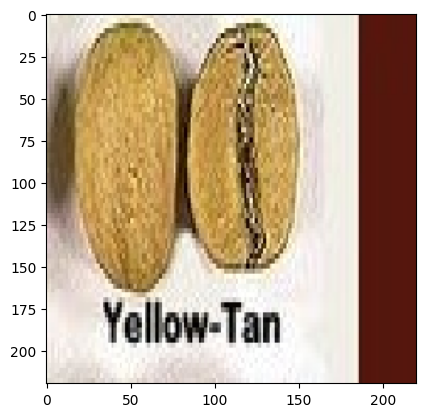

In [27]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/yellow.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Ini proses dimana kopi akan masuk medium (awal) dari fase light (akhir), namun ini masih light roasting. jadi memang membingungkan. untuk liat performansi model.

In [28]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 469ms/step
Prediksi kelas: Light


Ketika kita hanya menggunakan satu biji saja. model mengklasifikasikan dengan baik. padahal biji kopi ini kita tidak pastikan lao bolaven

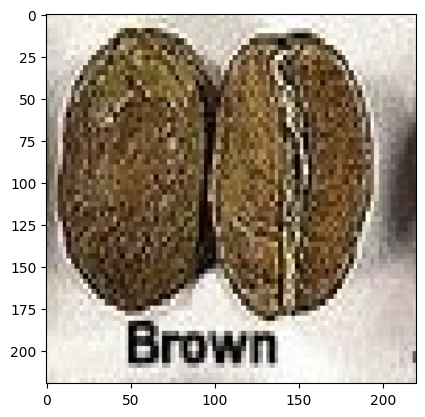

In [29]:
# Memuat gambar dan mengubah ukurannya sesuai dengan input model
img_path = '/content/brown.jpg'
img = image.load_img(img_path, target_size=(220, 220))  # Mengubah sesuai dengan spek model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

# Preprocess gambar (misalnya normalisasi seperti yang dilakukan saat pelatihan)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

Kita coba biji kopi random namun tingkat roasting medium

In [30]:
# Melakukan prediksi
predictions = model.predict(img_array)

# Jika ini adalah masalah klasifikasi, kamu bisa mendapatkan kelas dengan argmax
predicted_class = np.argmax(predictions, axis=-1)
predicted_class_index = np.argmax(predictions, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Prediksi kelas:", predicted_class_name)

1/1 [==============================] - 0s 468ms/step
Prediksi kelas: Medium


Kelas medium roasting dengan biji kopi random dapat diprediksi dengan baik. Dengan catatan pengambilan gambar harus satu dan sesuai dengan pengambilan gambar di studio.  

# Kesimpulan Akhir.

Model sangat baik sekali mendefinisikan jenis kopi dengan posisi harus sama persis dengan posisi pengambilan gambar seperti di studio. namun ketika ada noice model kesusahan untuk mendeteksi. Ketika perbedaan warna antara mepet-mepet medium dan light model akan susah mendeteksi dan model akan memilih prediksi light.

Untuk penggunaan model ini pada biji kopi lain maka diharapkan harus pengambilan pada angle dan background tertentu. Model sangat bagus dan bisa di deploy.